<a href="https://colab.research.google.com/github/TuanLBT/AI_learning/blob/main/bai_tap_tren_lop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

63.75207213999605


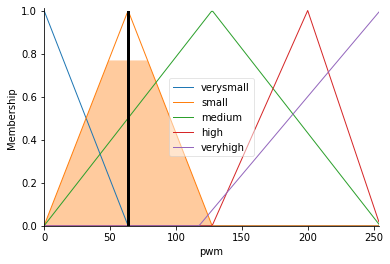

In [18]:
#Dieu khien may lanh
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl 

#Tạo biến mờ 
pwm = ctrl.Consequent(np.arange(0,255,1), 'pwm') #bien output
setpoint = ctrl.Antecedent(np.arange(12,32,1), 'setpoint')
sensor = ctrl.Antecedent(np.arange(-3,10), 'sensor')

#Dat cac trang thai
setpoint['short']=fuzz.trimf(setpoint.universe,[0,12,22])
setpoint['medium']=fuzz.trimf(setpoint.universe,[0,22,32])
setpoint['high']=fuzz.trimf(setpoint.universe,[22,32,32])

sensor['verysmall']=fuzz.trimf(sensor.universe,[-3,-3,31.5])
sensor['small']=fuzz.trimf(sensor.universe,[-3,15.75,31.5])
sensor['medium']=fuzz.trimf(sensor.universe,[15.75,31.5,47.25])
sensor['high']=fuzz.trimf(sensor.universe,[31.5,47.25,60])
sensor['veryhigh']=fuzz.trimf(sensor.universe,[31.5,60,60])

pwm['verysmall']=fuzz.trimf(pwm.universe,[0,0,255/4])
pwm['small']=fuzz.trimf(pwm.universe,[0,255/4,255/2])
pwm['medium']=fuzz.trimf(pwm.universe,[0,255/2,255])
pwm['high']=fuzz.trimf(pwm.universe,[255/2,200,255])
pwm['veryhigh']=fuzz.trimf(pwm.universe,[235/2,255,255])

rule1=ctrl.Rule(setpoint['short']&sensor['verysmall'],pwm['verysmall'])
rule2=ctrl.Rule(setpoint['short']&sensor['small'],pwm['small'])
rule3=ctrl.Rule(setpoint['short']&sensor['medium'],pwm['small'])
rule4=ctrl.Rule(setpoint['short']&sensor['high'],pwm['small'])
rule5=ctrl.Rule(setpoint['short']&sensor['veryhigh'],pwm['medium'])

rule5=ctrl.Rule(setpoint['medium']&sensor['verysmall'],pwm['small'])
rule6=ctrl.Rule(setpoint['medium']&sensor['small'],pwm['small'])
rule7=ctrl.Rule(setpoint['medium']&sensor['medium'],pwm['medium'])
rule8=ctrl.Rule(setpoint['medium']&sensor['high'],pwm['medium'])
rule9=ctrl.Rule(setpoint['medium']&sensor['veryhigh'],pwm['high'])

rule10=ctrl.Rule(setpoint['high']&sensor['verysmall'],pwm['medium'])
rule11=ctrl.Rule(setpoint['high']&sensor['small'],pwm['high'])
rule12=ctrl.Rule(setpoint['high']&sensor['medium'],pwm['high'])
rule13=ctrl.Rule(setpoint['high']&sensor['high'],pwm['veryhigh'])
rule14=ctrl.Rule(setpoint['high']&sensor['veryhigh'],pwm['veryhigh'])

pwm_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14])
pwm_cal = ctrl.ControlSystemSimulation(pwm_ctrl)

pwm_cal.input['sensor'] = 5
pwm_cal.input['setpoint']=22
pwm_cal.compute()
print(pwm_cal.output['pwm'])
pwm.view(sim=pwm_cal)

46.264284314806
-71.61662692391072


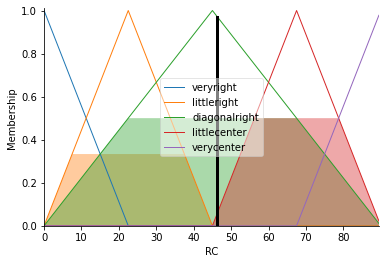

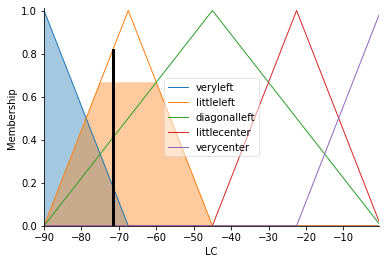

In [44]:
#Dieu khien module Robot / multi threading
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
#input 3-5 ultra sonic,
sensor_left = ctrl.Antecedent(np.arange(0,30,1), 'sensor_left') #Khoảng cách từ 0-30 Cm
sensor_center = ctrl.Antecedent(np.arange(0,30,1), 'sensor_center')
sensor_right = ctrl.Antecedent(np.arange(0,30,1), 'sensor_right')
#output: 
LC = ctrl.Consequent(np.arange(-90,0,0.5), 'LC') #NỬA 90 ĐỘ BÊN TRÁI
RC = ctrl.Consequent(np.arange(0,90,0.5), 'RC')  #NỬA 90 ĐỘ BÊN PHẢI

pwm_left = ctrl.Consequent(np.arange(0,255,1), 'pwm_left') # dong co 1
pwm_right = ctrl.Consequent(np.arange(0,255,1), 'pwm_right') # dong co 2

#Cam bien
sensor_left['veryclose']=fuzz.trimf(sensor_left.universe,[0,0,10])
sensor_left['close']=fuzz.trimf(sensor_left.universe,[0,10,15])
sensor_left['medium']=fuzz.trimf(sensor_left.universe,[0,15,30])
sensor_left['far']=fuzz.trimf(sensor_left.universe,[15,20,30])
sensor_left['veryfar']=fuzz.trimf(sensor_left.universe,[20,30,30])

sensor_center['veryclose']=fuzz.trimf(sensor_center.universe,[0,0,10])
sensor_center['close']=fuzz.trimf(sensor_center.universe,[0,10,15])
sensor_center['medium']=fuzz.trimf(sensor_center.universe,[0,15,30])
sensor_center['far']=fuzz.trimf(sensor_center.universe,[15,20,30])
sensor_center['veryfar']=fuzz.trimf(sensor_center.universe,[20,30,30])

sensor_right['veryclose']=fuzz.trimf(sensor_right.universe,[0,0,10])
sensor_right['close']=fuzz.trimf(sensor_right.universe,[0,10,15])
sensor_right['medium']=fuzz.trimf(sensor_right.universe,[0,15,30])
sensor_right['far']=fuzz.trimf(sensor_right.universe,[15,20,30])
sensor_right['veryfar']=fuzz.trimf(sensor_right.universe,[20,30,30])

#LC
LC['veryleft']=fuzz.trimf(LC.universe,[-90,-90,-67.5])
LC['littleleft']=fuzz.trimf(LC.universe,[-90,-67.5,-45])
LC['diagonalleft']=fuzz.trimf(LC.universe,[-90,-45,0])
LC['littlecenter']=fuzz.trimf(LC.universe,[-45,-22.5,0])
LC['verycenter']=fuzz.trimf(LC.universe,[-22.5,0,0])

#RC
RC['veryright']=fuzz.trimf(RC.universe,[0,0,22.5])
RC['littleright']=fuzz.trimf(RC.universe,[0,22.5,45])
RC['diagonalright']=fuzz.trimf(RC.universe,[0,45,90])
RC['littlecenter']=fuzz.trimf(RC.universe,[45,67.5,90])
RC['verycenter']=fuzz.trimf(RC.universe,[67.5,90,90])


#Dong co
pwm_left['verysmall']=fuzz.trimf(pwm_left.universe,[0,0,255/4])
pwm_left['small']=fuzz.trimf(pwm_left.universe,[0,255/4,255/2])
pwm_left['medium']=fuzz.trimf(pwm_left.universe,[0,255/2,255])
pwm_left['high']=fuzz.trimf(pwm_left.universe,[255/2,200,255])
pwm_left['veryhigh']=fuzz.trimf(pwm_left.universe,[235/2,255,255])

pwm_right['verysmall']=fuzz.trimf(pwm_right.universe,[0,0,255/4])
pwm_right['small']=fuzz.trimf(pwm_right.universe,[0,255/4,255/2])
pwm_right['medium']=fuzz.trimf(pwm_right.universe,[0,255/2,255])
pwm_right['high']=fuzz.trimf(pwm_right.universe,[255/2,200,255])
pwm_right['veryhigh']=fuzz.trimf(pwm_right.universe,[235/2,255,255])

#tao luat 
#LEFT AND CENTER
rule1=ctrl.Rule(sensor_left['veryclose']&sensor_center['veryclose'],LC['diagonalleft'])
rule2=ctrl.Rule(sensor_left['veryclose']&sensor_center['close'],LC['diagonalleft'])
rule3=ctrl.Rule(sensor_left['veryclose']&sensor_center['medium'],LC['littleleft'])
rule4=ctrl.Rule(sensor_left['veryclose']&sensor_center['far'],LC['veryleft'])
rule5=ctrl.Rule(sensor_left['veryclose']&sensor_center['veryfar'],LC['veryleft'])

rule6=ctrl.Rule(sensor_left['close']&sensor_center['veryclose'],LC['diagonalleft'])
rule7=ctrl.Rule(sensor_left['close']&sensor_center['close'],LC['diagonalleft'])
rule8=ctrl.Rule(sensor_left['close']&sensor_center['medium'],LC['littleleft'])
rule9=ctrl.Rule(sensor_left['close']&sensor_center['far'],LC['veryleft'])
rule10=ctrl.Rule(sensor_left['close']&sensor_center['veryfar'],LC['veryleft'])

rule11=ctrl.Rule(sensor_left['medium']&sensor_center['veryclose'],LC['verycenter'])
rule12=ctrl.Rule(sensor_left['medium']&sensor_center['close'],LC['littlecenter'])
rule13=ctrl.Rule(sensor_left['medium']&sensor_center['medium'],LC['diagonalleft'])
rule14=ctrl.Rule(sensor_left['medium']&sensor_center['far'],LC['littleleft'])
rule15=ctrl.Rule(sensor_left['medium']&sensor_center['veryfar'],LC['littleleft'])

rule16=ctrl.Rule(sensor_left['far']&sensor_center['veryclose'],LC['verycenter'])
rule17=ctrl.Rule(sensor_left['far']&sensor_center['close'],LC['littlecenter'])
rule18=ctrl.Rule(sensor_left['far']&sensor_center['medium'],LC['littlecenter'])
rule19=ctrl.Rule(sensor_left['far']&sensor_center['far'],LC['diagonalleft'])
rule20=ctrl.Rule(sensor_left['far']&sensor_center['veryfar'],LC['littleleft'])


rule21=ctrl.Rule(sensor_left['veryfar']&sensor_center['veryclose'],LC['verycenter'])
rule22=ctrl.Rule(sensor_left['veryfar']&sensor_center['close'],LC['littlecenter'])
rule23=ctrl.Rule(sensor_left['veryfar']&sensor_center['medium'],LC['diagonalleft'])
rule24=ctrl.Rule(sensor_left['veryfar']&sensor_center['far'],LC['littlecenter'])
rule25=ctrl.Rule(sensor_left['veryfar']&sensor_center['veryfar'],LC['diagonalleft'])

#center and right

rule26=ctrl.Rule(sensor_right['veryclose']&sensor_center['veryclose'],RC['diagonalright'])
rule27=ctrl.Rule(sensor_right['veryclose']&sensor_center['close'],RC['diagonalright'])
rule28=ctrl.Rule(sensor_right['veryclose']&sensor_center['medium'],RC['littleright'])
rule29=ctrl.Rule(sensor_right['veryclose']&sensor_center['far'],RC['veryright'])
rule30=ctrl.Rule(sensor_right['veryclose']&sensor_center['veryfar'],RC['veryright'])

rule31=ctrl.Rule(sensor_right['close']&sensor_center['veryclose'],RC['diagonalright'])
rule32=ctrl.Rule(sensor_right['close']&sensor_center['close'],RC['diagonalright'])
rule33=ctrl.Rule(sensor_right['close']&sensor_center['medium'],RC['littleright'])
rule34=ctrl.Rule(sensor_right['close']&sensor_center['far'],RC['veryright'])
rule35=ctrl.Rule(sensor_right['close']&sensor_center['veryfar'],RC['veryright'])

rule36=ctrl.Rule(sensor_right['medium']&sensor_center['veryclose'],RC['verycenter'])
rule37=ctrl.Rule(sensor_right['medium']&sensor_center['close'],RC['littlecenter'])
rule38=ctrl.Rule(sensor_right['medium']&sensor_center['medium'],RC['diagonalright'])
rule39=ctrl.Rule(sensor_right['medium']&sensor_center['far'],RC['littleright'])
rule40=ctrl.Rule(sensor_right['medium']&sensor_center['veryfar'],RC['littleright'])

rule41=ctrl.Rule(sensor_right['far']&sensor_center['veryclose'],RC['verycenter'])
rule42=ctrl.Rule(sensor_right['far']&sensor_center['close'],RC['littlecenter'])
rule43=ctrl.Rule(sensor_right['far']&sensor_center['medium'],RC['littlecenter'])
rule44=ctrl.Rule(sensor_right['far']&sensor_center['far'],RC['diagonalright'])
rule45=ctrl.Rule(sensor_right['far']&sensor_center['veryfar'],RC['littleright'])


rule46=ctrl.Rule(sensor_right['veryfar']&sensor_center['veryclose'],RC['verycenter'])
rule47=ctrl.Rule(sensor_right['veryfar']&sensor_center['close'],RC['littlecenter'])
rule48=ctrl.Rule(sensor_right['veryfar']&sensor_center['medium'],RC['diagonalright'])
rule49=ctrl.Rule(sensor_right['veryfar']&sensor_center['far'],RC['littlecenter'])
rule50=ctrl.Rule(sensor_right['veryfar']&sensor_center['veryfar'],RC['diagonalright'])

#And RC va LC
rule51=ctrl.Rule(RC['veryright']&LC['veryleft'],pwm_left['medium'])
rule52=ctrl.Rule(RC['veryright']&LC['littleleft'],pwm_left['high'])
rule53=ctrl.Rule(RC['veryright']&LC['diagonalleft'],pwm_left['high'])
rule54=ctrl.Rule(RC['veryright']&LC['littlecenter'],pwm_left['high'])
rule55=ctrl.Rule(RC['veryright']&LC['verycenter'],pwm_left['high'])

#Dau ra la RC hoac LC
RC_ctrl = ctrl.ControlSystem([rule26,rule27,rule28,rule29,rule30,rule31,rule32,rule33,rule34,rule35,rule36,rule37,rule38,rule39,rule40,rule41,rule42,rule43,rule44,rule45,rule46,rule47,rule48,rule49,rule50])
LC_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
#pwm_left_ctrl = ctrl.ControlSystem([rule51,rule52,rule53,rule54,rule55])
#dau ra la dong co 1

RC_ctrl = ctrl.ControlSystemSimulation(RC_ctrl)
LC_ctrl = ctrl.ControlSystemSimulation(LC_ctrl)

LC_ctrl.input['sensor_left'] = 0
LC_ctrl.input['sensor_center']= 20 
RC_ctrl.input['sensor_center']= 20 
RC_ctrl.input['sensor_right']= 25 

RC_ctrl.compute()
LC_ctrl.compute()

#pwm_left_ctrl.input['RC'] = RC_ctrl.output['RC']
#pwm_left_ctrl.input['LC'] = LC_ctrl.output['LC']
#pwm_left_ctrl.compute()


print(RC_ctrl.output['RC'])
print(LC_ctrl.output['LC'])
#print(pwm_left_ctrl.output['pwm_left'])
RC.view(sim=RC_ctrl)
LC.view(sim=LC_ctrl)
#pwm_left.view(sim=pwm_left_ctrl)



In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 27.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=4532201615c72363f3dcfd09423442378fdcd32ff229e57662526f9f8872b251
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy
